<a href="https://colab.research.google.com/github/201ssc/python_test1/blob/main/python_ml_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지도학습 알고리즘


In [ ]:
!pip install mglearn

In [6]:
import mglearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

X.shape: (26, 2)


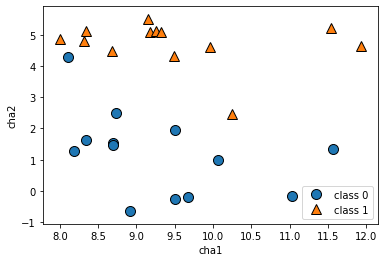

In [7]:
# 데이터 셋 만들기
X, y = mglearn.datasets.make_forge()
# 산점도 그리기
mglearn.discrete_scatter(X[:,0], X[:,1], y) # y값이 특성을 의미함
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("cha1")
plt.ylabel("cha2")
print('X.shape:',X.shape)

(40, 1)

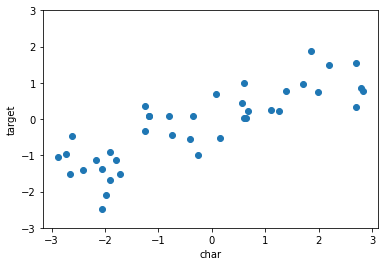

In [13]:
# 회귀 알고리즘, 저차원 데이터셋 이용
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3) # 좌표 크기
plt.xlabel("char")
plt.ylabel("target")
X.shape

In [18]:
# 유방암, 고차원 데이터셋
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cancer.keys()
cancer.data.shape

(569, 30)

In [20]:
import numpy as np

print("클래스별 샘플 갯수: \n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
# cancer.target_names         > ['malignant', 'benign'] 양성 음성
# np.bincount(cancer.target)  > [212, 357]

클래스별 샘플 갯수: 
 {'malignant': 212, 'benign': 357}


In [21]:
# 특성 이름
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [22]:
cancer.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [25]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)

데이터의 형태: (506, 13)


In [27]:
# 특성 확장
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


# k-최근접 이웃 분류
- 가장 가까운 훈련 데이터 포인트 하나를 최근접 이웃으로 찾아 예측

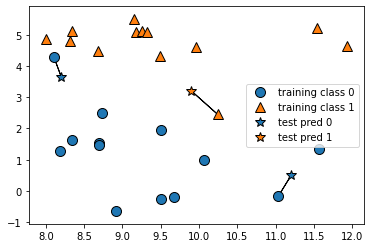

In [28]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

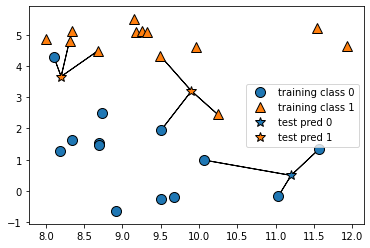

In [29]:
mglearn.plots.plot_knn_classification(n_neighbors=3)